In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
image_ds_zip = '/content/drive/MyDrive/archive.zip'
extracted_ds_path = '/content/drive/MyDrive/Flickr8kdataset'

In [ ]:
with zipfile.ZipFile(image_ds_zip, 'r') as zip_ref:
  zip_ref.extractall(extracted_ds_path)

In [3]:
with open(extracted_ds_path+"/captions.txt", 'r') as captions:
  print(captions.read(1000))

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
1002674143_1b742ab4b8

In [ ]:
from PIL import Image
from IPython.display import display

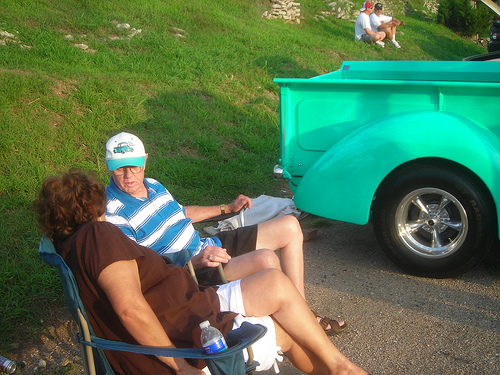

In [ ]:
img = Image.open('/content/drive/MyDrive/Flickr8kdataset/Images/3726120436_740bda8416.jpg')
img.show()
display(img)

In [ ]:
img.size

(500, 375)

Since Images are of varying dimensions, converting them into a fixed size of 224 * 224

In [ ]:
import os
target_size = (224, 224)

folder_path = '/content/drive/MyDrive/Flickr8kdataset/Images'
for image_name in os.listdir(folder_path):
  image_path = os.path.join(folder_path, image_name)

  img = Image.open(image_path)

  resized_img = img.resize(target_size, Image.ANTIALIAS)

  output_path = os.path.join('/content/drive/MyDrive/Flickr8kdataset/ResizedImages', image_name)
  resized_img.save(output_path)


<ipython-input-8-58abf583a284>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


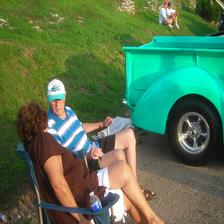

In [ ]:
img = Image.open('/content/drive/MyDrive/Flickr8kdataset/ResizedImages/3726120436_740bda8416.jpg')
img.show()
display(img)

In [3]:
import pandas as pd

In [4]:
caps_df = pd.read_csv(extracted_ds_path+"/captions.txt")
caps_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
caps_df.loc[caps_df['image'] == '3726120436_740bda8416.jpg']

,image,caption
35160,3726120436_740bda8416.jpg,A man and woman sitting in chairs next to a tu...
35161,3726120436_740bda8416.jpg,An older couple chats near a bright colored car .
35162,3726120436_740bda8416.jpg,There is a man and a woman sitting on folding ...
35163,3726120436_740bda8416.jpg,Two old people sitting in chairs talking in fr...
35164,3726120436_740bda8416.jpg,Woman and man sit next to their green truck .


Output from the
penultimate layer of the pre-trained model of VGG16 from Keras was used to extract features of the images in the dataset. This was fed into our image model consisting of two
hidden layers. Output from this module was further passed on sequentially to the captioning module consisting of a LSTM layer which used words and image I as inputs and
predicted one word of the caption at a time, considering the context of image observed
and of the preceding words p(St|I, S0, ..., St−1). We trained the model using Stochastic
Gradient Descent on the Flickr8K Dataset [13] for a total of 50 epochs reaching a loss
value of 1.693. Batch size of 256 and categorical cross entropy loss function was chosen
for our experiment. The caption so generated was given as input to the second step of
the algorithm.

In [73]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

Pre-trained VGG16 model (minus the top layer) which will be used to extract features of the images in the dataset.

In [74]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [7]:
vgg_model.trainable = False

Since the training dataset is huge (80k+ rows) but colab offers only 12GB of free RAM, cutting down the size of the dataset.

In [12]:
caps_df = caps_df.iloc[:2500,:]

In [13]:
caps_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
2495,1463732807_0cdf4f22c7.jpg,A boy on a playground swing strikes a medatati...
2496,1463732807_0cdf4f22c7.jpg,A boy on a swing wearing a green shirt is maki...
2497,1463732807_0cdf4f22c7.jpg,A young boy makes a meditational pose on a swi...
2498,1463732807_0cdf4f22c7.jpg,Boy in green shirt sitting in swing with eyes ...


In [14]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(caps_df, test_size=0.1, random_state = 42)

In [15]:
len(train_df['image'].unique())

500

Using the VGG16 model to extract features from each unique image in the training dataframe

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
def extract_image_features(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = vgg_model.predict(img_array)
    return features

In [17]:
image_features = {}
count = 0
for img_path in train_df['image'].unique():
    img_full_path = '/content/drive/MyDrive/Flickr8kdataset/ResizedImages/' + img_path
    image_features[img_path] = extract_image_features(img_full_path)
    print(count)
    count = count+1

1/1 [==============================] - 3s 3s/step
0
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 38ms/step
4
1/1 [==============================] - 0s 34ms/step
5
1/1 [==============================] - 0s 31ms/step
6
1/1 [==============================] - 0s 25ms/step
7
1/1 [==============================] - 0s 22ms/step
8
1/1 [==============================] - 0s 17ms/step
9
1/1 [==============================] - 0s 17ms/step
10
1/1 [==============================] - 0s 19ms/step
11
1/1 [==============================] - 0s 20ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 20ms/step
14
1/1 [==============================] - 0s 18ms/step
15
1/1 [==============================] - 0s 19ms/step
16
1/1 [==============================] - 0s 18ms/step
17
1/1 [=================

In [22]:
image_features['1307635496_94442dc21a.jpg']

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.3849642 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

Colab had been crashing multiple times due to the overusage of RAM, hence, using the pickle library to save important python objects.

In [18]:
import pickle

with open('/content/drive/MyDrive/pickles/image_features.pkl', 'wb') as file:
  pickle.dump(image_features, file)


In [19]:
import pickle
with open('/content/drive/MyDrive/pickles/image_features.pkl', "rb") as file:
  image_f = pickle.load(file)

In [56]:
image_f['1307635496_94442dc21a.jpg'] #dictionary where each key:value is an image file name and its corresponding feature output from VGG16

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.3849642 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['caption'].values)
vocabsize = len(tokenizer.word_index) + 1

In [21]:
vocabsize

2074

Converting captions into a sequence of integers

In [22]:
train_seq = tokenizer.texts_to_sequences(train_df['caption'].values)
val_seq = tokenizer.texts_to_sequences(val_df['caption'].values)

Padding the sequence with extra 0s at the end to have an uniform input shape

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, train_seq))
traincaps_padded = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
valcaps_padded = pad_sequences(val_seq, maxlen=max_len, padding='post', truncating='post')

In [24]:
train_seq

[[2, 50, 528, 325, 2, 30, 1123, 93],
 [12, 56, 1124, 5, 1125, 452, 17, 2, 648, 37, 127, 355, 191, 5],
 [12,
  61,
  356,
  122,
  79,
  57,
  117,
  2,
  803,
  84,
  398,
  23,
  2,
  30,
  7,
  16,
  31,
  3,
  79,
  6,
  23,
  2,
  1126,
  1127],
 [2, 13, 34, 4, 18],
 [2, 206, 10, 7, 2, 22, 34, 5, 2, 253],
 [20, 13, 201, 17, 3, 85, 64, 3, 399, 154],
 [14, 8, 400, 4, 18],
 [2, 16, 9, 8, 2, 235, 62, 4, 80, 72, 453, 33, 18],
 [12, 454, 804, 11, 27, 7, 19, 36, 132, 5, 3, 42],
 [2, 1128, 74, 38, 805, 1129, 37, 2, 10, 7, 2, 13, 806, 7, 2, 22, 58, 51],
 [2, 14, 357, 5, 3, 177, 254, 53, 2, 529],
 [807, 207, 325, 2, 55, 1130, 37, 1131, 4, 1132, 64, 3, 455],
 [20, 14, 4, 105, 7, 52, 358, 110, 8, 2, 649, 456],
 [208, 20, 25, 34, 5, 2, 808, 359, 2, 809, 42],
 [20, 14, 155, 650, 297, 7, 2, 530, 27, 9],
 [2, 255, 298, 326, 4, 2, 1133, 1134, 133],
 [2, 13, 6, 73, 24, 457, 7, 47, 86, 2, 236, 192, 1135, 48, 2, 118],
 [2, 27, 9, 401, 15, 98, 2, 62],
 [2, 14, 360, 23, 2, 299, 237],
 [50, 531, 46, 2, 1

In [25]:
traincaps_padded

array([[   2,   50,  528, ...,    0,    0,    0],
       [  12,   56, 1124, ...,    0,    0,    0],
       [  12,   61,  356, ...,    0,    0,    0],
       ...,
       [   2,   16,    7, ...,    0,    0,    0],
       [   3,   29,   14, ...,    0,    0,    0],
       [   2,   13,  444, ...,    0,    0,    0]], dtype=int32)

In [26]:
with open('/content/drive/MyDrive/pickles/traincaps_padded.pkl', 'wb') as file:
  pickle.dump(traincaps_padded, file)

with open('/content/drive/MyDrive/pickles/valcaps_padded.pkl', 'wb') as file:
  pickle.dump(valcaps_padded, file)

In [20]:
import pickle
with open('/content/drive/MyDrive/pickles/traincaps_padded.pkl', "rb") as file:
  traincaps_padded = pickle.load(file)

with open('/content/drive/MyDrive/pickles/valcaps_padded.pkl', "rb") as file:
  valcaps_padded = pickle.load(file)

Creating training data:
1. converting the feature dictionary into an np array of features.
2. training text, where the last column is sliced off. the idea is to train the model to predict the n+1 th element, given n elements.
3. training output, which will be a one-hot encoded representation of the target caps.

In [27]:
import numpy as np

In [28]:
from tensorflow.keras.utils import to_categorical

train_features = np.array([image_features[img] for img in train_df['image']])
train_txt = traincaps_padded[:, :-1]
train_out = to_categorical(traincaps_padded[:, 1:], num_classes=vocabsize)


In [117]:
train_txt[0].shape

(28,)

Doing the same for the validation data

In [30]:
from tensorflow.keras.utils import to_categorical

val_features = np.array([image_f[img] for img in val_df['image']])
val_text = valcaps_padded[:, :-1]
val_out = to_categorical(valcaps_padded[:, 1:], num_classes=vocabsize)

In [6]:
train_out

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [31]:
with open('/content/drive/MyDrive/pickles/val_features.pkl', 'wb') as file:
  pickle.dump(val_features, file)

with open('/content/drive/MyDrive/pickles/valn_txt.pkl', 'wb') as file:
  pickle.dump(val_text, file)

with open('/content/drive/MyDrive/pickles/val_out.pkl', 'wb') as file:
  pickle.dump(val_out, file)

In [ ]:
# vgg -> image model with 2 hidden layers -> cap model with LSTM layer inp words and image

Implementing the model

In [33]:
from tensorflow.keras.layers import Concatenate

In [167]:
image_features = Input(shape=(1, 7, 7, 512)) #shape of vgg16 penultimate layer output
caption_input = Input(shape=(28,))

Features passed on to Image model consisting of two hidden layers

In [168]:
flattened_image = Dense(256, activation='relu')(image_features)
layer1 = Flatten()(flattened_image)

Output of image model passed sequentially to captioning module consisting of a LSTM layer which used words and image I as inputs and
predicted one word of the caption at a time, considering the context of image observed
and of the preceding words p(St|I, S0, ..., St−1).

In [169]:
shared_embedding = Embedding(vocabsize, 128, input_length=49)
shared_lstm = LSTM(256, return_sequences=True)
embedded_caption = shared_embedding(caption_input)
lstm_output = shared_lstm(embedded_caption)
flattened_caption = Dense(256, activation='relu')(lstm_output)
layer2 = Flatten()(flattened_caption)

Concatenating both the models

In [170]:
concatenated = Concatenate(axis=1)([layer1, layer2])


merged = Dense(512, activation='relu')(concatenated)
output = Dense(28*vocabsize, activation='softmax')(merged)
from keras.layers import Reshape
output1 = Reshape((28, vocabsize))(output)

single_model = Model(inputs=[image_features, caption_input], outputs=output1)

In [53]:
single_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 28)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 28, 128)              265472    ['input_11[0][0]']            
                                                                                                  
 input_10 (InputLayer)       [(None, 1, 7, 7, 512)]       0         []                            
                                                                                                  
 lstm_4 (LSTM)               (None, 28, 256)              394240    ['embedding_4[0][0]']         
                                                                                            

Model trained using SGD for a total of 50 epochs.

In [64]:
from tensorflow.keras.optimizers import SGD, schedules

In [163]:
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
single_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [3]:
import pickle
with open('/content/drive/MyDrive/pickles/train_features.pkl', 'rb') as file:
  train_features = pickle.load(file)

with open('/content/drive/MyDrive/pickles/train_txt.pkl', 'rb') as file:
  train_txt = pickle.load(file)

with open('/content/drive/MyDrive/pickles/train_out.pkl', 'rb') as file:
  train_out = pickle.load(file)

with open('/content/drive/MyDrive/pickles/val_features.pkl', 'rb') as file:
  val_features = pickle.load(file)

with open('/content/drive/MyDrive/pickles/val_txt.pkl', 'rb') as file:
  val_txt = pickle.load(file)

with open('/content/drive/MyDrive/pickles/val_out.pkl', 'rb') as file:
  val_out = pickle.load(file)


In [164]:
single_model.fit([train_features, train_txt], train_out, epochs=50, batch_size=256, validation_data=([val_features, val_text], val_out))

Epoch 1/50
9/9 [==============================] - 7s 610ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 2/50
9/9 [==============================] - 3s 310ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 3/50
9/9 [==============================] - 1s 154ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 4/50
9/9 [==============================] - 1s 107ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 5/50
9/9 [==============================] - 1s 126ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 6/50
9/9 [==============================] - 1s 119ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 7/50
9/9 [==============================] - 1s 107ms/step - loss: nan - accuracy: 0.6396 - val_loss: nan - val_accuracy: 0.6383
Epoch 8/50
9/9 [==============================] - 1s 105ms/ste

In [67]:
single_model.save('/content/drive/MyDrive/Flickr8kdataset/single_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Evaluating on test data

In [71]:
caps_df_test = pd.read_csv('/content/drive/MyDrive/Flickr8kdataset/captions.txt').iloc[2500:5000,:]

In [72]:
caps_df_test

,image,caption
2500,1464120327_d90279ca3a.jpg,A little boy presses his face a window .
2501,1464120327_d90279ca3a.jpg,A little boy puts his face up to the uniquely-...
2502,1464120327_d90279ca3a.jpg,A little boy stands up next to a window and cr...
2503,1464120327_d90279ca3a.jpg,A young boy in a blue shirt presses against th...
2504,1464120327_d90279ca3a.jpg,Little boy peering into a glass display case .
...,...,...
4995,2098418613_85a0c9afea.jpg,A brown chow mix dog is standing in front of a...
4996,2098418613_85a0c9afea.jpg,A brown dog standing in a muddy yard .
4997,2098418613_85a0c9afea.jpg,A brown dogs walks near a green van and some j...
4998,2098418613_85a0c9afea.jpg,A large brown dog stands in front of a green v...


In [75]:
len(caps_df_test['image'].unique())

500

In [77]:
image_features_test = {}
count = 0
for img_path in caps_df_test['image'].unique():
    img_full_path = '/content/drive/MyDrive/Flickr8kdataset/ResizedImages/' + img_path
    image_features_test[img_path] = extract_image_features(img_full_path)
    print(count)
    count = count+1

1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 18ms/step
3
1/1 [==============================] - 0s 18ms/step
4
1/1 [==============================] - 0s 18ms/step
5
1/1 [==============================] - 0s 24ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 17ms/step
8
1/1 [==============================] - 0s 18ms/step
9
1/1 [==============================] - 0s 17ms/step
10
1/1 [==============================] - 0s 18ms/step
11
1/1 [==============================] - 0s 18ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 18ms/step
14
1/1 [==============================] - 0s 18ms/step
15
1/1 [==============================] - 0s 17ms/step
16
1/1 [==============================] - 0s 20ms/step
17
1/1 [===============

In [78]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(caps_df_test['caption'].values)
testvocabsize = len(tokenizer.word_index) + 1

In [79]:
testvocabsize

2292

In [80]:
test_seq = tokenizer.texts_to_sequences(caps_df_test['caption'].values)


In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, test_seq))
testcaps_padded = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')

In [82]:
test_seq

[[2, 28, 16, 710, 26, 132, 2, 292],
 [2, 28, 16, 897, 26, 132, 38, 15, 4, 1226, 1227, 292],
 [2, 28, 16, 60, 38, 70, 15, 2, 292, 8, 1228],
 [2, 27, 16, 3, 2, 29, 39, 710, 312, 4, 441, 78, 2, 1229, 216, 22, 1230],
 [28, 16, 1231, 49, 2, 441, 711, 1232],
 [2, 13, 6, 7, 175, 3, 52, 19, 9, 109, 3, 67, 64],
 [2, 13, 6, 40, 3, 2, 95],
 [2, 13, 6, 18, 2, 24, 199, 7, 712, 2, 121, 898, 2, 95],
 [2, 13, 6, 9, 2, 24, 199, 713, 2, 133, 68, 442, 19],
 [4, 13, 6, 1233, 68, 4, 19, 899, 1234, 34, 313, 3, 26, 714],
 [2, 502, 580, 33, 4, 443, 50, 26, 715],
 [2, 10, 503, 30, 4, 293, 3, 2, 268],
 [2, 10, 9, 2, 24, 141, 396],
 [2, 41, 900, 293, 37, 74, 2, 1235],
 [10, 396, 33, 314, 397],
 [2, 502, 7, 1236, 443, 3, 2, 217, 142, 37, 18, 716, 225],
 [2, 10, 7, 581, 3, 1237, 293],
 [2, 10, 717, 3, 314, 19],
 [10, 3, 2, 268, 175, 3, 314, 397],
 [41, 396, 3, 17, 19],
 [2, 56, 11, 25, 504, 2, 246, 582, 5, 2, 53],
 [2, 10, 3, 34, 107, 236, 444, 61, 2, 1238, 398],
 [2,
  10,
  3,
  34,
  107,
  236,
  294,
  15,
  

In [83]:
testcaps_padded

array([[   2,   50,  528, ...,    0,    0,    0],
       [  12,   56, 1124, ...,    0,    0,    0],
       [  12,   61,  356, ...,    0,    0,    0],
       ...,
       [   2,   16,    7, ...,    0,    0,    0],
       [   3,   29,   14, ...,    0,    0,    0],
       [   2,   13,  444, ...,    0,    0,    0]], dtype=int32)

In [89]:
results = single_model.evaluate([val_features, val_text], val_out, batch_size=2500)

1/1 [==============================] - 0s 107ms/step - loss: nan - accuracy: 0.6383


In [145]:
predictions =  single_model.predict([val_features, val_text],  batch_size=2500)

1/1 [==============================] - 0s 42ms/step


In [166]:
val_out[150]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)